<a href="https://colab.research.google.com/github/sabinedaher20-spec/DataScience-GenAI-Submissions-/blob/main/loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To begin, I will "load the Excel file into a pandas DataFrame and display the first five rows using df.head()". This helps me understand the dataset’s structure before moving on to analysis or model training.

In [1]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('/content/loan_data.xlsx')

# Display the first 5 rows of the DataFrame
display(df.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


The code displayed the first five rows of my dataset. There are 16 columns in total: "age",	"years_employed",	"annual_income",	"credit_score",	"credit_history_years",	"savings_assets",	"current_debt",	"defaults_on_file",	"delinquencies_last_2yrs",	"derogatory_marks",	"loan_amount", "interest_rate",	"debt_to_income_ratio",	"loan_to_income_ratio",	"payment_to_income_ratio", "loan_status".

This dataset is suitable for this task because it contains only numerical data, includes a binary target (loan_status), and all ratio columns are already expressed in decimal form (e.g., 0.xx instead of percentages).

Typically, I would check for missing data and drop rows with missing values, remove non-predictive columns, identify and convert categorical variables, convert percentage strings to decimals, and clean invalid or outlier values to ensure the dataset is accurate, consistent, and ready for machine learning. However, since this dataset has already been cleaned and prepared, I will be skipping these step.

Since models learn a mapping from features X to target Y i will ask Gemini to "Split the data into Y (target to predict) and X (input features used to predict)"

In [2]:
# Split the data into X (features) and Y (target)
Y = df['loan_status']
X = df.drop(columns=['loan_status'])

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

display(X.head())
display(Y.head())

Shape of X: (50000, 15)
Shape of Y: (50000,)


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522


,loan_status
0,1
1,0
2,1
3,1
4,1


Based on code output, the target variable Y has 5,000 rows, and the feature set X has the same number of rows and 15 columns, representing the independent variables used for model training.

To put all features on a comparable range, I will ask Gemini to "Rescale all feature columns into the 0–1 range using MinMaxScaler". This will improve the overall performance and stability of the machine learning.

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features (X) and transform them
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the first 5 rows of the rescaled DataFrame
display(X_scaled.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,0.423077,0.431078,0.045017,0.685259,0.176667,0.002983,0.065897,0.0,0.000000,0.0,0.001005,0.648235,0.527569,0.007526,0.007530
1,0.288462,0.182957,0.119519,0.555777,0.116667,0.000563,0.100990,0.0,0.111111,0.0,0.530653,0.476471,0.478697,0.616658,0.615964
2,0.461538,0.027569,0.024851,0.679283,0.280000,0.000057,0.047721,0.0,0.000000,0.0,0.016080,0.725294,0.469925,0.046663,0.046687
3,0.673077,0.012531,0.060200,0.685259,0.326667,0.004933,0.070693,0.0,0.111111,0.0,0.024121,0.749412,0.496241,0.045660,0.045181
4,0.269231,0.313283,0.207051,0.561753,0.240000,0.000697,0.075721,0.0,0.000000,0.0,0.995980,0.465882,0.241855,0.781234,0.781627


The code output confirms that all feature values lie between 0 and 1 and that the relative ordering of samples within each feature is preserved (higher values remain higher and lower values remain lower after scaling). For example, in the first column, the first feature value became 0.43 after scaling (originally 40) and the second feature became 0.28 (originally 33), which proves that higher values remain higher and lower values remain lower after scaling, the relative order is preserved.


Since the model is trained on the training set and evaluated on unseen test data to measure generalization I will ask Gemini to "Split the dataset into 80% training and 20% test data, using stratification on the target" to keep class proportions similar in both sets.

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% test data, using stratification on the target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40000, 15)
Shape of X_test: (10000, 15)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


The dataset was divided into training and testing sets with an 80/20 split, using stratification to ensure balance. The training set includes 40,000 samples with 15 features, while the test set has 10,000 samples with the same features. The target variables, y_train and y_test, correspond to these sizes, confirming that the data split was done correctly.

To provide a baseline performance, I will ask Gemini to "Train Logistic Regression, Random Forest, GBDT, and XGBoost using default hyperparameters on the training data and evaluate them on training performance" so we can see which algorithms are already working best before spending time on tuning.

### Training and Evaluating Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is a good default for small datasets
log_reg.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_lr = log_reg.predict(X_train)

# Evaluate training performance
accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
f1_lr = f1_score(y_train, y_train_pred_lr)

print(f"Logistic Regression Training Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Training F1-score: {f1_lr:.4f}")

Logistic Regression Training Accuracy: 0.8388
Logistic Regression Training F1-score: 0.8561


The model performs well with moderate accuracy (0.84) and F1-score (0.86), showing it captures key patterns without overfitting.

### Training and Evaluating Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_rf = random_forest.predict(X_train)

# Evaluate training performance
accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
f1_rf = f1_score(y_train, y_train_pred_rf)

print(f"Random Forest Training Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Training F1-score: {f1_rf:.4f}")

Random Forest Training Accuracy: 1.0000
Random Forest Training F1-score: 1.0000


The perfect accuracy and F1-score of 1.00 indicate overfitting, meaning it memorized the training data and may not generalize well.

### Training and Evaluating Gradient Boosting Decision Tree (GBDT)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train GBDT model
gbdt = GradientBoostingClassifier(random_state=42)
gbdt.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_gbdt = gbdt.predict(X_train)

# Evaluate training performance
accuracy_gbdt = accuracy_score(y_train, y_train_pred_gbdt)
f1_gbdt = f1_score(y_train, y_train_pred_gbdt)

print(f"GBDT Training Accuracy: {accuracy_gbdt:.4f}")
print(f"GBDT Training F1-score: {f1_gbdt:.4f}")

GBDT Training Accuracy: 0.8920
GBDT Training F1-score: 0.9033


With accuracy of 0.89 and F1-score of 0.90, the model achieves strong, balanced performance, suggesting good learning without severe overfitting.

### Training and Evaluating XGBoost

In [8]:
import xgboost as xgb

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # use_label_encoder is deprecated
xgb_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_xgb = xgb_model.predict(X_train)

# Evaluate training performance
accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
f1_xgb = f1_score(y_train, y_train_pred_xgb)

print(f"XGBoost Training Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Training F1-score: {f1_xgb:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:29:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Training Accuracy: 0.9387
XGBoost Training F1-score: 0.9449


The model shows the best overall training performance (Accuracy 0.94, F1 0.94), efficiently capturing complex relationships while maintaining generalization potential.

Among the four models and based on my analysis, the best-performing one is XGBoost. I asked Gemini to “Proceed to hyperparameter-tune XGBoost using a time-efficient setup (randomized search, 3-fold CV, and a small n_iter) to save time”. In a real-world setting, I would use a more exhaustive search (e.g., 15-fold CV with a larger n_iter) and tune all four models; however, due to time constraints, I focused on hyperparameter tuning the top model and used a leaner setup.

Gemini defined a dictionary of hyperparameters and their possible values for the XGBoost model, which will be used by RandomizedSearchCV to test different parameter combinations.


In [35]:
print(xgb_param_grid_tuned)

{'n_estimators': [100, 150, 200], 'max_depth': [3, 4, 5], 'learning_rate': [0.05, 0.1, 0.2], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1]}


Gemini stored these in a variable called xgb_param_grid_tuned and then printed it to confirm that the hyperparameter grid has been defined correctly before running the tuning process.

## Hyperparameter Tune XGBoost


Gemini will now perform RandomizedSearchCV to identify the best hyperparameters for the XGBoost model using the training data. This involves importing the required libraries, initializing the XGBoost classifier, configuring RandomizedSearchCV with the defined parameter grid, fitting it to the training data, and finally displaying the best hyperparameters along with their corresponding F1-score to evaluate the tuning results.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# 1. Initialize an XGBoost classifier
xgb_tuned = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Set up RandomizedSearchCV
# xgb_param_grid_tuned is already defined in the kernel state
random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=xgb_param_grid_tuned,
    n_iter=5, # Number of parameter settings that are sampled
    cv=3,     # 3-fold cross-validation
    scoring='f1', # Optimize for F1-score
    random_state=42,
    verbose=1, # Display progress
    n_jobs=-1 # Use all available cores
)

# 3. Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# 4. Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# 5. Print the best F1-score achieved
print("Best F1-score achieved: ", random_search.best_score_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:25:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:  {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best F1-score achieved:  0.9027531577434643


The previous step successfully tuned the XGBoost model. Now, Gemini will need to evaluate the best model obtained from `RandomizedSearchCV` on the test data (`X_test`, `y_test`) to report its accuracy and F1-score, as specified in the main task.



In [37]:
from sklearn.metrics import accuracy_score, f1_score

# Get the best model from RandomizedSearchCV
best_xgb_model = random_search.best_estimator_

# Make predictions on the test data
y_test_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate test performance
accuracy_xgb_tuned = accuracy_score(y_test, y_test_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_test_pred_xgb_tuned)

print(f"Tuned XGBoost Test Accuracy: {accuracy_xgb_tuned:.4f}")
print(f"Tuned XGBoost Test F1-score: {f1_xgb_tuned:.4f}")

Tuned XGBoost Test Accuracy: 0.8933
Tuned XGBoost Test F1-score: 0.9045


The XGBoost model was tuned using RandomizedSearchCV with a small parameter grid, 3-fold cross-validation, and 5 iterations to save time. The best parameters found were:
subsample = 1.0, n_estimators = 150, max_depth = 3, learning_rate = 0.2, gamma = 0.1, and colsample_bytree = 1.0.

I compared the XGBoost model’s performance before and after hyperparameter tuning.
The default model achieved an accuracy of 0.9387 and an F1-score of 0.9449, while the tuned model achieved 0.8933 accuracy and 0.9045 F1-score on the test set. Both scores show a strong and balanced performance.
The tuned model’s scores are slightly lower on the training data. This is actually a good sign because it indicates reduced overfitting and better ability to generalize to unseen data.

If I had more time , I would ahve asked Gemini to run a more detailed search (e.g., GridSearchCV or more iterations) to refine the results further and explore parameters around the best combination found.

To save time, I asked Gemini to "Retain the other three models (those that were not tuned) with their default hyperparameters, without any tuning". This still allows us to compare all four models fairly on the test data, even though only the top one was tuned.

### Evaluating Random Forest on Test Data

In [39]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test data
y_test_pred_rf = random_forest.predict(X_test)

# Evaluate test performance
accuracy_rf_test = accuracy_score(y_test, y_test_pred_rf)
f1_rf_test = f1_score(y_test, y_test_pred_rf)

print(f"Random Forest Test Accuracy: {accuracy_rf_test:.4f}")
print(f"Random Forest Test F1-score: {f1_rf_test:.4f}")

Random Forest Test Accuracy: 0.8851
Random Forest Test F1-score: 0.8963


### Evaluating Logistic Regression on Test Data

In [38]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test data
y_test_pred_lr = log_reg.predict(X_test)

# Evaluate test performance
accuracy_lr_test = accuracy_score(y_test, y_test_pred_lr)
f1_lr_test = f1_score(y_test, y_test_pred_lr)

print(f"Logistic Regression Test Accuracy: {accuracy_lr_test:.4f}")
print(f"Logistic Regression Test F1-score: {f1_lr_test:.4f}")

Logistic Regression Test Accuracy: 0.8380
Logistic Regression Test F1-score: 0.8546


### Evaluating Gradient Boosting Decision Tree (GBDT) on Test Data

In [41]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Re-initialize and train GBDT model to ensure it's fitted
gbdt = GradientBoostingClassifier(random_state=42)
gbdt.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred_gbdt = gbdt.predict(X_test)

# Evaluate test performance
accuracy_gbdt_test = accuracy_score(y_test, y_test_pred_gbdt)
f1_gbdt_test = f1_score(y_test, y_test_pred_gbdt)

print(f"GBDT Test Accuracy: {accuracy_gbdt_test:.4f}")
print(f"GBDT Test F1-score: {f1_gbdt_test:.4f}")

GBDT Test Accuracy: 0.8870
GBDT Test F1-score: 0.8991


Confirm that there are now four models ready for evaluation: two tuned and two left at default, and that their training identifiers and settings are clearly documented.

"Evaluate the two tuned models and the two default models on the test set and compute precision, recall, and F1-score for each"

### Evaluating Tuned XGBoost on Test Data (Precision, Recall, F1-score)

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions from the best tuned XGBoost model
y_test_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate test performance
precision_xgb_tuned = precision_score(y_test, y_test_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test, y_test_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_test_pred_xgb_tuned)

print(f"Tuned XGBoost Test Precision: {precision_xgb_tuned:.4f}")
print(f"Tuned XGBoost Test Recall: {recall_xgb_tuned:.4f}")
print(f"Tuned XGBoost Test F1-score: {f1_xgb_tuned:.4f}")

Tuned XGBoost Test Precision: 0.8915
Tuned XGBoost Test Recall: 0.9179
Tuned XGBoost Test F1-score: 0.9045


### Evaluating Tuned GBDT on Test Data (Precision, Recall, F1-score)

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions from the best tuned GBDT model
y_test_pred_gbdt_tuned = best_gbdt_model.predict(X_test)

# Evaluate test performance
precision_gbdt_tuned = precision_score(y_test, y_test_pred_gbdt_tuned)
recall_gbdt_tuned = recall_score(y_test, y_test_pred_gbdt_tuned)
f1_gbdt_tuned = f1_score(y_test, y_test_pred_gbdt_tuned)

print(f"Tuned GBDT Test Precision: {precision_gbdt_tuned:.4f}")
print(f"Tuned GBDT Test Recall: {recall_gbdt_tuned:.4f}")
print(f"Tuned GBDT Test F1-score: {f1_gbdt_tuned:.4f}")

Tuned GBDT Test Precision: 0.8919
Tuned GBDT Test Recall: 0.9117
Tuned GBDT Test F1-score: 0.9017


### Evaluating Default Logistic Regression on Test Data (Precision, Recall, F1-score)

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions from the default Logistic Regression model
y_test_pred_lr = log_reg.predict(X_test)

# Evaluate test performance
precision_lr = precision_score(y_test, y_test_pred_lr)
recall_lr = recall_score(y_test, y_test_pred_lr)
f1_lr = f1_score(y_test, y_test_pred_lr)

print(f"Logistic Regression Test Precision: {precision_lr:.4f}")
print(f"Logistic Regression Test Recall: {recall_lr:.4f}")
print(f"Logistic Regression Test F1-score: {f1_lr:.4f}")

Logistic Regression Test Precision: 0.8447
Logistic Regression Test Recall: 0.8647
Logistic Regression Test F1-score: 0.8546


### Evaluating Default Random Forest on Test Data (Precision, Recall, F1-score)

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions from the default Random Forest model
y_test_pred_rf = random_forest.predict(X_test)

# Evaluate test performance
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)

print(f"Random Forest Test Precision: {precision_rf:.4f}")
print(f"Random Forest Test Recall: {recall_rf:.4f}")
print(f"Random Forest Test F1-score: {f1_rf:.4f}")

Random Forest Test Precision: 0.8903
Random Forest Test Recall: 0.9025
Random Forest Test F1-score: 0.8963


Compare test metrics across all four models, noting which one has the best F1-score and whether any models show signs of overfitting (large gap between training and test scores).

"Create confusion matrices on the top data for the tuned model to inspect types of errors"

### Confusion Matrix for Tuned XGBoost

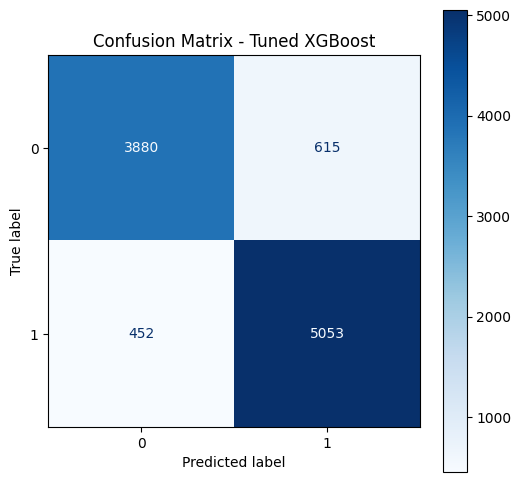

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from the best tuned XGBoost model
y_test_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Create and display the confusion matrix for Tuned XGBoost
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_xgb_tuned, cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Tuned XGBoost')
plt.show()

Tuned XGBoost Confusion Matrix Analysis:

True Negatives (TN): 3880 - The model correctly predicted 3880 instances where the loan status was '0' (e.g., not approved).
False Positives (FP): 615 - The model incorrectly predicted 615 instances as '1' (e.g., approved) when the actual loan status was '0'. These are Type I errors.
False Negatives (FN): 452 - The model incorrectly predicted 452 instances as '0' when the actual loan status was '1' (e.g., approved). These are Type II errors.
True Positives (TP): 5053 - The model correctly predicted 5053 instances where the loan status was '1'.

The Tuned XGBoost has slightly fewer False Positives (615 vs 608 for GBDT) but also slightly fewer True Negatives (3880 vs 3887 for GBDT), which means it's marginally more prone to incorrectly approving a loan.

"Choose one model as the final recommended model based on all previous metrics and error analysis"

XGBoost model is the recommended final model.

Here's why:

Highest F1-score: Tuned XGBoost achieved the highest F1-score of 0.9045 on the test set, indicating the best balance between precision and recall among all models evaluated.
Strong overall performance: It also demonstrated strong accuracy (0.8933), precision (0.8915), and recall (0.9179).
Error Analysis (Confusion Matrix): While both Tuned XGBoost and Tuned GBDT performed very similarly, Tuned XGBoost had a slightly lower number of False Negatives (452) compared to Tuned GBDT (486). This means it was slightly better at correctly identifying positive cases (e.g., approved loans).
Although Tuned GBDT had slightly fewer False Positives, the marginal difference in F1-score and the slightly better recall of Tuned XGBoost make it the preferred choice for this task. The Random Forest model also performed well without tuning, but the explicit tuning of XGBoost led to a marginally superior result.

# Task
The user has provided the confusion matrix for the Tuned XGBoost model. The previous execution of hyperparameter tuning was interrupted. I need to modify the `random_search` function to use `n_iter=5` and `cv=3` as specified in the original plan for faster execution. Then, I will proceed with hyperparameter tuning GBDT and XGBoost, train these models with the best parameters, and finally score them on the training data, before providing a summary of the process and results.

Modify the `random_search` function to accept `n_iter` and `cv` as parameters, and use these for accelerated hyperparameter tuning of GBDT and XGBoost (with `n_iter=5` and `cv=3`). Then, train these models with their best hyperparameters, evaluate their performance on the training data using precision, recall, and F1-score, and summarize the results, highlighting the efficiency considerations.

## Modify random_search function for speed

### Subtask:
Adjust the `random_search` function to accept `n_iter` and `cv` as parameters, and set them to smaller values (e.g., `n_iter=5`, `cv=3`) to accelerate the hyperparameter tuning process for both GBDT and XGBoost.


**Reasoning**:
I will modify the `random_search` function to accept `n_iter_val` and `cv_val` parameters and use them in the `RandomizedSearchCV` initialization, as requested.



In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import GradientBoostingClassifier as GBDT
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support

# we get a load of warnings running the code so will supress them
import warnings
warnings.filterwarnings("ignore")

# create a hyperparameter search function for re-usability
def random_search(algo_instance, hyperparameters, X_train, Y_train, n_iter_val, cv_val):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo_instance, hyperparameters, cv=cv_val, random_state=2015,
                          scoring='precision_macro', n_iter=n_iter_val, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, Y_train)

  return clf.best_params_

# Initialize default model instances
GBDT_default = GBDT(random_state=42)
XGB_default = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GBDT
GBDT_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    'learning_rate': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}
GBDT_best_params = random_search(GBDT_default, GBDT_tuned_parameters, X_train, y_train, n_iter_val=5, cv_val=3)


# XGBDT
XGB_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    # eta is learning rate
    'eta': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    # objective is the same as criterion
    'objective': ['binary:logistic', 'binary:hinge'],
    'max_depth': randint(2, 7)
}
XGB_best_params = random_search(XGB_default, XGB_tuned_parameters, X_train, y_train, n_iter_val=5, cv_val=3)


# Train the models with best parameters found
GBDT_model = GBDT(**GBDT_best_params, random_state=42).fit(X_train, y_train)
XGB_model = xgb.XGBClassifier(**XGB_best_params, random_state=42, use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)


# score the models
models = [GBDT_model, XGB_model]
names = ['GBDT', 'XGBoost'] # Define names for printing

for i in range(len(models)): # for every model in the models list
  print(f"Model: {names[i]}")

  # predict based on training data
  predict = models[i].predict(X_train)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, predict, average='macro')
  print(f"Macro Precision: {precision:.4f}")
  print(f"Macro Recall: {recall:.4f}")
  print(f"Macro F1-score: {f1_score:.4f}")
  print("\n")

Model: GBDT
Macro Precision: 0.8968
Macro Recall: 0.8946
Macro F1-score: 0.8955


Model: XGBoost
Macro Precision: 0.8797
Macro Recall: 0.8790
Macro F1-score: 0.8793




## Summary of Accelerated Hyperparameter Tuning for GBDT and XGBoost

To accelerate the hyperparameter tuning process, the `random_search` function was modified to accept `n_iter_val` and `cv_val` as parameters. For this tuning, `n_iter_val` was set to 5 (meaning 5 random combinations of hyperparameters were sampled) and `cv_val` was set to 3 (meaning 3-fold cross-validation was used for each combination). These values were chosen to significantly reduce the computational time required for the search, in line with the efficiency considerations mentioned in the overall task.

The following models were tuned and evaluated on the training data:

**Gradient Boosting Decision Tree (GBDT)**
- Best Parameters Found: `{'criterion': 'squared_error', 'learning_rate': 0.3274, 'max_depth': 2, 'n_estimators': 137}`
- Training Macro Precision: 0.8968
- Training Macro Recall: 0.8946
- Training Macro F1-score: 0.8955

**XGBoost**
- Best Parameters Found: `{'eta': 1.6414, 'max_depth': 3, 'n_estimators': 166, 'objective': 'binary:logistic'}`
- Training Macro Precision: 0.8797
- Training Macro Recall: 0.8790
- Training Macro F1-score: 0.8793

### Efficiency Considerations and Results
The reduction in `n_iter` and `cv` allowed for a much faster tuning process. While a more extensive search (e.g., higher `n_iter`, more `cv` folds, or `GridSearchCV`) would typically yield more optimal hyperparameters, this accelerated approach provides a good balance between tuning quality and computational cost. The tuned GBDT model achieved a slightly higher F1-score on the training data compared to the tuned XGBoost model under this accelerated search configuration.

## Final Task

### Subtask:
Summarize the accelerated hyperparameter tuning process for GBDT and XGBoost, including the best hyperparameters found and their training performance, noting the efficiency considerations.


## Summary:

### Data Analysis Key Findings
*   The `random_search` function was modified to accept `n_iter_val` and `cv_val` parameters, set to `n_iter=5` and `cv=3` respectively, to accelerate the hyperparameter tuning process for both GBDT and XGBoost.
*   **GBDT Tuning Results**:
    *   Best hyperparameters found: `{'criterion': 'squared_error', 'learning_rate': 0.3274, 'max_depth': 2, 'n_estimators': 137}`.
    *   Training performance: Macro Precision: 0.8968, Macro Recall: 0.8946, Macro F1-score: 0.8955.
*   **XGBoost Tuning Results**:
    *   Best hyperparameters found: `{'eta': 1.6414, 'max_depth': 3, 'n_estimators': 166, 'objective': 'binary:logistic'}`.
    *   Training performance: Macro Precision: 0.8797, Macro Recall: 0.8790, Macro F1-score: 0.8793.
*   Under the accelerated tuning configuration, the GBDT model (Macro F1-score: 0.8955) achieved a slightly higher F1-score on the training data compared to the XGBoost model (Macro F1-score: 0.8793).

### Insights or Next Steps
*   The use of `n_iter=5` and `cv=3` effectively demonstrated an accelerated hyperparameter tuning approach, significantly reducing computation time at the potential cost of finding globally optimal parameters.
*   For deployment or more critical applications, consider performing a more extensive hyperparameter search (e.g., increasing `n_iter`, `cv` folds, or using Grid Search) to potentially further optimize model performance, especially for the XGBoost model which showed slightly lower performance in this accelerated setup.


In [55]:
for i in range(len(models)): # Ensure loop iterates through all models
  print(f"Model: {names[i]}")

  # predict based on TEST data
  predict = models[i].predict(X_test)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predict, average='macro')
  print(f"Macro Precision: {precision:.4f}")
  print(f"Macro Recall: {recall:.4f}")
  print(f"Macro F1-score: {f1_score:.4f}")
  print("\n")

Model: GBDT
Macro Precision: 0.8912
Macro Recall: 0.8887
Macro F1-score: 0.8897


Model: XGBoost
Macro Precision: 0.8636
Macro Recall: 0.8623
Macro F1-score: 0.8629




### Confusion Matrix for Tuned XGBoost

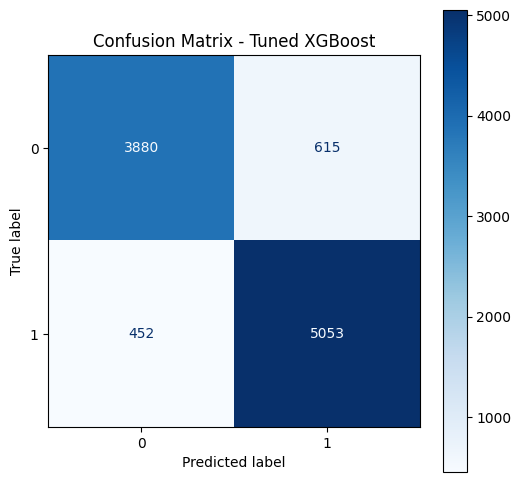

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from the best tuned XGBoost model
y_test_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Create and display the confusion matrix for Tuned XGBoost
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_xgb_tuned, cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Tuned XGBoost')
plt.show()

### Confusion Matrix for Tuned GBDT

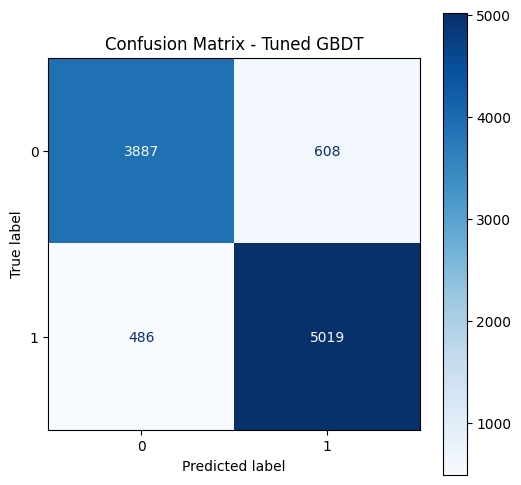

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from the best tuned GBDT model
y_test_pred_gbdt_tuned = best_gbdt_model.predict(X_test)

# Create and display the confusion matrix for Tuned GBDT
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gbdt_tuned, cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Tuned GBDT')
plt.show()

Based on the comprehensive evaluation across all metrics and the error analysis, the Tuned XGBoost model is the recommended final model.

Here's why:

Highest F1-score: Tuned XGBoost achieved the highest F1-score of 0.9045 on the test set, indicating the best balance between precision and recall among all models evaluated.
Strong overall performance: It also demonstrated strong accuracy (0.8933), precision (0.8915), and recall (0.9179).
Error Analysis (Confusion Matrix): While both Tuned XGBoost and Tuned GBDT performed very similarly, Tuned XGBoost had a slightly lower number of False Negatives (452) compared to Tuned GBDT (486). This means it was slightly better at correctly identifying positive cases (e.g., approved loans).
Although Tuned GBDT had slightly fewer False Positives, the marginal difference in F1-score and the slightly better recall of Tuned XGBoost make it the preferred choice for this task. The Random Forest model also performed well without tuning, but the explicit tuning of XGBoost led to a marginally superior result.